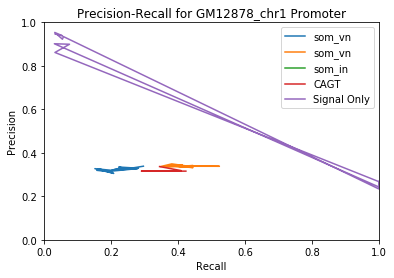

<Figure size 432x288 with 0 Axes>

In [146]:
import pandas as pd

import pylab as pl
from sklearn.metrics import precision_recall_curve

import csv
def readSOM(filename):
    data = pd.read_csv(filename)
    avgSOM = data.groupby(['Chromosome', 'Sigma', 'Alpha'],as_index=False).mean()
    return avgSOM[:16]
#print(columns['Weak_Precision'])
def readCAGT(filename):
    data = pd.read_csv(filename)
    avgCAGT = data.groupby(['Chromosome', 'K', 'Max_Dist'],as_index=False).mean()
    return avgCAGT[:16]

def plot_precision_recall(lines, fname):
    pl.clf()
    for precision, recall, label in lines:
        pl.plot(recall, precision, label=label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 1.0])
    pl.xlim([0.0, 1.0])
    pl.title('Precision-Recall for GM12878_chr1 Promoter')
    pl.legend(loc="upper right")
    pl.show()
    pl.savefig(fname)

def main(filename):
    lines = []
    som_file = []
    for s in filename:
        if s[0:3] == 'som':
            som_file.append(s)
        elif s[0:4] == 'cagt':
            cagt = s
        else : 
            signal = s    

    for i,fname in enumerate(som_file):
        y_test = readSOM(fname)
        label = fname[0:6]
        lines.append((y_test['Promoter_Precision'], y_test['Promoter_Recall'],label))
    
    y_test = readCAGT(cagt)
    lines.append((y_test['Promoter_Precision'], y_test['Promoter_Recall'], 'CAGT'))
    dataSignal = pd.read_csv(signal)
    y_test = dataSignal[:16]
    lines.append((y_test['Promoter_Precision'], y_test['Promoter_Recall'], 'Signal Only'))

    png_fname = 'pr_curve.png'
    plot_precision_recall(lines, png_fname)
    
main(('som_vn_chromhmmperm_intrachrom_pr.csv',
        'som_vn_intrachrom_pr.csv',
        'signal_intrachrom_pr.csv',
        'cagt_intrachrom_pr.csv',
        'som_intrachrom_pr.csv'))
# exclude all value of each RE having the same alpha and sigma 
# sum the precision (and recall) values, divide for the number of row (to average) 
# assign to a new variable (dict)


In [128]:
data = pd.read_csv('som_vn_chromhmmperm_intrachrom_pr.csv')
avg = data.groupby(['Chromosome', 'Sigma', 'Alpha'],as_index=False).mean()
avg[:16]


,Chromosome,Sigma,Alpha,Unnamed: 0,Repeat,Promoter_Precision,Enhancer_Precision,Repressor_Precision,Weak_Precision,Promoter_Recall,Enhancer_Recall,Repressor_Recall,Weak_Recall
0,1,2,0.2,512,3,0.327778,0.249959,0.102714,0.311922,0.241941,0.263893,0.218863,0.273102
1,1,2,0.4,516,3,0.330029,0.244494,0.101172,0.309494,0.282054,0.267131,0.180453,0.265932
2,1,2,0.6,520,3,0.320725,0.258286,0.094496,0.324578,0.202709,0.235956,0.266053,0.285524
3,1,2,0.8,524,3,0.318973,0.250045,0.097810,0.323744,0.205429,0.281405,0.220992,0.291858
4,1,4,0.2,513,3,0.327195,0.256930,0.098452,0.320698,0.151759,0.349045,0.283176,0.218235
5,1,4,0.4,517,3,0.305262,0.257462,0.097480,0.326289,0.207931,0.259777,0.221704,0.305063
6,1,4,0.6,521,3,0.327040,0.260787,0.096504,0.314988,0.163952,0.212596,0.258855,0.347200
7,1,4,0.8,525,3,0.319502,0.256946,0.101973,0.316559,0.157435,0.198647,0.254599,0.405209
8,1,6,0.2,514,3,0.313952,0.257096,0.109618,0.321828,0.189281,0.340016,0.177580,0.300435
9,1,6,0.4,518,3,0.327340,0.236094,0.101985,0.290786,0.279114,0.181270,0.229555,0.312273


<class '_csv.reader'>
<class '_csv.reader'>
<class '_csv.reader'>
<class '_csv.reader'>
<class '_csv.reader'>


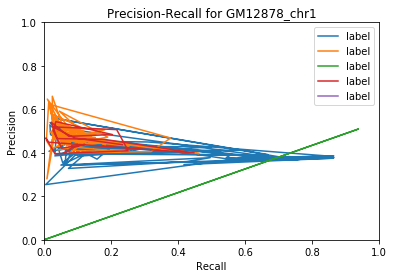

<Figure size 432x288 with 0 Axes>

In [103]:
import sys
import numpy as np
import pandas as pd
import pylab as pl
from sklearn.metrics import precision_recall_curve

import csv
def read(filename):
    from collections import defaultdict
    columns_indices = defaultdict(int)
    columns = defaultdict(list)
    with open(filename, newline ='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        print(type(reader))
        for i,row in enumerate(reader):
            if i == 0: 
                for j,name in enumerate(row):

                    columns_indices[name] = j   
                continue
            if row[1]=='GM12878' and row[2] == '1':
                columns['Alpha'].append(float(row[columns_indices['Alpha']]))
                columns['Sigma'].append(float(row[columns_indices['Sigma']]))
    return columns
#print(columns['Weak_Precision'])


def plot_precision_recall(lines, fname):
    pl.clf()
    for precision, recall, label in lines:
        pl.plot(recall, precision, label=label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 1.0])
    pl.xlim([0.0, 1.0])
    pl.title('Precision-Recall for GM12878_chr1')
    pl.legend(loc="upper right")
    pl.show()
    pl.savefig(fname)

def main(filename):
    lines = []
  
    for i,fname in enumerate(filename):
        y_test = read(fname)
        
        lines.append((y_test['Promoter_Precision'], y_test['Promoter_Recall'], 'label'))
    png_fname = 'pr_curve.png'
    plot_precision_recall(lines, png_fname)
    
main(('som_vn_chromhmmperm_intrachrom_pr.csv',
        'som_vn_intrachrom_pr.csv',
        'signal_intrachrom_pr.csv',
        'cagt_intrachrom_pr.csv',
        'som_intrachrom_pr.csv'))


In [80]:
def main(filename):
    lines = []
    for fname in enumerate(filename):
        y_test = read(fname)
        precision, recall, threshold = precision_recall_curve(y_test)

        lines.append((precision, recall, label))
    png_fname = 'pr_curve.png'
    plot_precision_recall(lines, png_fname)
    
main(('som_vn_chromhmmperm_intrachrom_pr.csv',
        'som_vn_intrachrom_pr.csv',
        'signal_intrachrom_pr.csv',
        'cagt_intrachrom_pr.csv',
        'som_intrachrom_pr.csv'))

FileNotFoundError: [Errno 2] No such file or directory: 'filename'

In [50]:
from collections import defaultdict
#columns_names = defaultdict(str) 
columns_indices = defaultdict(int)
columns = defaultdict(list)
with open('som_vn_chromhmmperm_intrachrom_pr.csv', newline ='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    print(type(reader))
    for i,row in enumerate(reader):
        if i == 0: 
            for j,name in enumerate(row):
                #columns_names[j] = name
                columns_indices[name] = j   
            continue
        if row[1]=='GM12878':
            columns['Weak_Precision'].append(float(row[columns_indices['Weak_Precision']]))
print(columns['Weak_Precision'])


    

<class '_csv.reader'>
[0.40327169274537694, 0.3422712933753943, 0.4196750902527076, 0.4146666666666667, 0.4496268656716418, 0.4071146245059288, 0.4427558257345491, 0.3434739941118744, 0.3775588396278051, 0.3598590693718868, 0.32815533980582523, 0.4610011641443539, 0.4710659898477158, 0.4156279961649089, 0.4511278195488722, 0.4208229426433915, 0.4294294294294294, 0.4280684104627767, 0.3846988605534455, 0.4299065420560748, 0.3545966228893058, 0.4286472148541114, 0.25384615384615383, 0.3921636316561664, 0.5598705501618123, 0.3738901429646351, 0.3763194501268309, 0.4605488850771869, 0.3716849451645065, 0.3834237531864828, 0.4498824535157085, 0.454468802698145, 0.3990945259980793, 0.4785631517960602, 0.4934687953555878, 0.4678899082568808, 0.3738658457550227, 0.4734177215189874, 0.43386689132266215, 0.4399633363886343, 0.37094017094017095, 0.4836363636363637, 0.5288888888888889, 0.3889739663093415, 0.4565131837859111, 0.39943208707998107, 0.5394736842105263, 0.5147826086956522, 0.3666277542